In [13]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import networkx as nx

from opt_utils import load_graph, fixed_point_iteration, decompose_psd

In [14]:
import os
folder = os.path.abspath(os.getcwd())

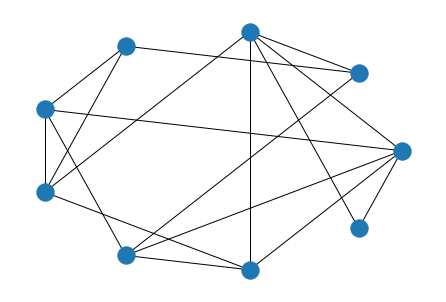

In [15]:
graph_file = "brock200-2.mtx"
graph_type = 1

n = 9
G = nx.complement(load_graph(graph_file, graph_type, n))

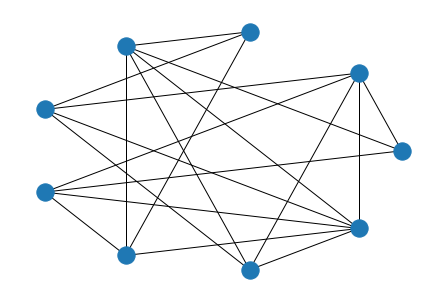

In [16]:
nx.draw(G, nx.circular_layout(G))


## Lovasz

In [17]:
Z = cp.Variable((n,n), PSD=True)

In [18]:
J = cp.Parameter((n,n), symmetric=True, value=np.ones((n,n)))

In [19]:
constraints_lovasz = [ cp.trace(Z) == 1 ]
constraints_lovasz += [ Z[i][j] == 0  for (i,j) in G.edges ]

In [20]:
prob_lovasz = cp.Problem(cp.Maximize(cp.trace(J @ Z)), constraints_lovasz)
prob_lovasz.solve()

3.0000000725894003

In [21]:
np.linalg.eigvalsh(Z.value)

array([-4.13645816e-09, -2.14827621e-09,  2.46162485e-09,  1.72732723e-02,
        1.91758253e-02,  1.05615815e-01,  1.84771529e-01,  2.01684533e-01,
        4.71479024e-01])

In [22]:
Z_val = Z.value

In [23]:
# 1/n * I
prob_center_lovasz = cp.Problem(cp.Maximize(cp.log_det(Z)), constraints_lovasz)

prob_center_lovasz.solve()

Z_center = Z.value
Z.value = Z_val

In [24]:
Z_val

array([[ 2.20954085e-01,  4.61642012e-10,  1.11350006e-01,
        -2.52426309e-10,  5.17692016e-02,  1.35051446e-09,
         1.09618947e-01,  1.14754411e-01,  5.44315230e-02],
       [ 4.61642012e-10, -5.69938966e-10, -5.88922880e-06,
         1.02096728e-06,  3.99946167e-10,  3.62229324e-10,
         4.87596929e-06,  4.61865898e-10,  5.41867024e-10],
       [ 1.11350006e-01, -5.88922880e-06,  1.65540071e-01,
         1.40223815e-09, -2.55659805e-10,  5.41728024e-02,
         1.28041365e-09,  1.11097921e-01,  5.44353890e-02],
       [-2.52426309e-10,  1.02096728e-06,  1.40223815e-09,
         5.82063218e-02,  5.82023651e-02,  5.81957371e-02,
         1.39561218e-09, -3.02803854e-10, -3.40955167e-10],
       [ 5.17692016e-02,  3.99946167e-10, -2.55659805e-10,
         5.82023651e-02,  1.10709565e-01,  5.89354564e-02,
         5.25157514e-02,  1.34225858e-09,  1.46925379e-09],
       [ 1.35051446e-09,  3.62229324e-10,  5.41728024e-02,
         5.81957371e-02,  5.89354564e-02,  1.123485

### Fixed point iteration

In [25]:
Z_path = fixed_point_iteration(prob_lovasz, Z, -Z_center, False, returns_path=True, verbose=True)

initial objective: 3.000000
initial eigenvalues:
[-4.13645816e-09 -2.14827621e-09  2.46162485e-09  1.72732723e-02
  1.91758253e-02  1.05615815e-01  1.84771529e-01  2.01684533e-01
  4.71479024e-01]
current objective: 2.979885
current eigenvalues:
[-1.31264140e-09 -6.48374466e-10  8.12147328e-10  9.54736368e-10
  3.56965686e-09  5.41596108e-09  9.50321236e-09  2.55299002e-08
  9.99999950e-01]
fixed point objective: 2.979885
fixed point eigenvalues:
[-1.10415679e-10 -1.09291696e-10 -1.08463155e-10 -1.08463121e-10
 -1.08463120e-10 -1.08463107e-10 -1.07634464e-10 -1.06510533e-10
  9.99999999e-01]
iterations:  2


In [26]:
Z_fixed_point = Z.value
Z.value = Z_val

In [27]:
Z_fixed_point

array([[ 4.12185721e-01,  3.43710618e-17,  3.44811110e-01,
         4.58035264e-16, -4.84403985e-13, -1.07559938e-12,
        -6.20209707e-12,  3.51274751e-01, -2.19215348e-12],
       [ 3.43710618e-17, -1.08463120e-10,  5.08364519e-17,
         4.71920386e-23,  7.53170217e-24, -2.16722307e-23,
         4.14676669e-22,  2.92917830e-17,  6.79829240e-24],
       [ 3.44811110e-01,  5.08364519e-17,  2.88449345e-01,
         3.83188721e-16, -2.29205756e-13, -1.59055055e-12,
        -2.93551343e-12,  2.93856459e-01, -1.83384749e-12],
       [ 4.58035264e-16,  4.71920386e-23,  3.83188721e-16,
        -1.08463117e-10,  4.56524706e-18,  4.58856293e-18,
         3.44229634e-20,  3.90354205e-16, -4.78036315e-21],
       [-4.84403985e-13,  7.53170217e-24, -2.29205756e-13,
         4.56524706e-18, -1.08463112e-10,  2.63289690e-18,
         8.18629540e-18, -2.33500674e-13, -2.45925948e-19],
       [-1.07559938e-12, -2.16722307e-23, -1.59055055e-12,
         4.58856293e-18,  2.63289690e-18, -1.084631

In [28]:
z = decompose_psd(Z_fixed_point)
z * 1 / np.min([z[i] for i in range(n) if z[i] > 1e-6])

array([[ 1.19539571e+00],
       [ 4.13433293e-16],
       [ 1.00000000e+00],
       [ 1.32839368e-15],
       [-1.04613795e-12],
       [-4.52707883e-12],
       [-1.57341515e-11],
       [ 1.01874546e+00],
       [-5.53115113e-12]])

## Grotschel

In [30]:
X = cp.Variable((n,n), symmetric=True)
x = cp.Variable((n,1), nonneg=True)

X_plus = cp.bmat([[cp.Constant([[1]]), x.T], [x, X]])

In [31]:
e = cp.Parameter(n, value=np.ones(n))

In [32]:
constraints_grotschel = [ X_plus >> 0 ]
constraints_grotschel += [ X[i][i] == x[i] for i in range(n)]
constraints_grotschel += [ X[i][j] == 0 for (i,j) in G.edges ]

In [33]:
# prob_grotschel = cp.Problem(cp.Maximize(e @ x), constraints_grotschel)  # slightly different from result of maximizing tr(X)
prob_grotschel = cp.Problem(cp.Maximize(cp.trace(X)), constraints_grotschel)
prob_grotschel.solve()

3.000000047624404

In [34]:
np.linalg.eigvalsh(X.value)

array([-3.27789881e-09, -2.69191614e-09,  8.85488240e-09,  4.13181354e-02,
        5.07246558e-02,  3.49443309e-01,  5.24633697e-01,  7.54170140e-01,
        1.27971011e+00])

In [35]:
X_val = X.value
x_val = x.value

In [36]:
X_val

array([[ 6.04254550e-01,  6.73403627e-10,  3.05600365e-01,
        -2.15648553e-11,  1.49114119e-01,  1.17744244e-09,
         2.98653077e-01,  2.53329774e-01,  2.01815918e-01],
       [ 6.73403627e-10,  8.18909627e-09, -3.98147673e-06,
         5.73006233e-06,  9.47578531e-11,  6.25921911e-10,
        -1.73956620e-06,  1.35126113e-10,  1.36907511e-10],
       [ 3.05600365e-01, -3.98147673e-06,  4.66752648e-01,
         1.17423441e-09, -8.31879432e-11,  1.61169373e-01,
         1.15088988e-09,  2.64944196e-01,  2.01809468e-01],
       [-2.15648553e-11,  5.73006233e-06,  1.17423441e-09,
         2.34590628e-01,  2.34587074e-01,  2.34577207e-01,
         1.09440624e-09, -9.26022705e-11, -1.12985633e-10],
       [ 1.49114119e-01,  9.47578531e-11, -8.31879432e-11,
         2.34587074e-01,  3.83359696e-01,  2.34234212e-01,
         1.48773055e-01,  6.08489182e-10,  7.19883182e-10],
       [ 1.17744244e-09,  6.25921911e-10,  1.61169373e-01,
         2.34577207e-01,  2.34234212e-01,  3.957454

In [37]:
prob_center_grotschel = cp.Problem(cp.Maximize(cp.log_det(X_plus)), constraints_grotschel)

prob_center_grotschel.solve()

X_center = X.value
x_center = x.value
X.value = X_val
x.value = x_val

In [87]:
X_center

array([[2.90240785e-01, 3.01195447e-10, 9.24155132e-02, 8.99995689e-11,
        6.14613112e-02, 2.68937381e-10, 8.77804242e-02, 8.05754927e-02,
        7.76995054e-02],
       [3.01195447e-10, 1.61600208e-01, 3.94809033e-02, 5.13233308e-02,
        4.08944287e-10, 3.74582518e-10, 4.68396738e-02, 3.95388883e-10,
        4.62591891e-10],
       [9.24155132e-02, 3.94809033e-02, 2.71369576e-01, 3.01855003e-10,
        1.06576154e-10, 6.27703141e-02, 3.42979392e-10, 7.99888788e-02,
        7.77006410e-02],
       [8.99995689e-11, 5.13233308e-02, 3.01855003e-10, 2.02612505e-01,
        7.80557150e-02, 7.97506163e-02, 3.90272820e-10, 1.68178037e-10,
        2.23415583e-10],
       [6.14613112e-02, 4.08944287e-10, 1.06576154e-10, 7.80557150e-02,
        2.19931962e-01, 7.34435543e-02, 5.96685426e-02, 3.71039903e-10,
        3.24111565e-10],
       [2.68937381e-10, 3.74582518e-10, 6.27703141e-02, 7.97506163e-02,
        7.34435543e-02, 2.25548842e-01, 2.03917976e-10, 6.36587355e-02,
        2.5

### Fixed point iteration

In [38]:
X_path = fixed_point_iteration(prob_grotschel, X, -X_center, False, returns_path=True, verbose=True)

initial objective: 3.000000
initial eigenvalues:
[-3.27789881e-09 -2.69191614e-09  8.85488240e-09  4.13181354e-02
  5.07246558e-02  3.49443309e-01  5.24633697e-01  7.54170140e-01
  1.27971011e+00]
current objective: 3.000000
current eigenvalues:
[-8.70029795e-09 -8.10711969e-09  2.04974173e-09  1.02760961e-08
  1.48730707e-08  1.05574551e-07  1.60112772e-07  3.28794263e-07
  2.99999953e+00]
fixed point objective: 3.000000
fixed point eigenvalues:
[-2.72777207e-10 -2.42740066e-10 -9.60933212e-11  5.37312999e-11
  2.68663201e-10  3.16967958e-10  4.91039767e-10  7.02589330e-10
  3.00000000e+00]
iterations:  2


In [39]:
X_fixed_point = X.value
X.value = X_val
x.value = x_val

In [40]:
X_fixed_point

array([[ 1.00000000e+00,  5.43377259e-11,  1.00000000e+00,
         2.84269122e-11,  1.28674114e-10,  2.77083483e-11,
         1.40945214e-10,  1.00000000e+00,  1.66194716e-10],
       [ 5.43377259e-11,  2.37642919e-10,  1.27446052e-10,
         4.03781711e-11, -7.08722233e-12,  2.04408655e-11,
         1.36827413e-10,  5.38322050e-11,  1.37659998e-11],
       [ 1.00000000e+00,  1.27446052e-10,  1.00000000e+00,
         4.95290284e-11,  4.23643427e-11,  1.00343990e-10,
         2.32883362e-11,  1.00000000e+00,  1.62936052e-10],
       [ 2.84269122e-11,  4.03781711e-11,  4.95290284e-11,
         2.05821507e-10,  5.06929306e-11,  2.96179929e-10,
         3.34380904e-11,  3.82272135e-11,  2.23633757e-11],
       [ 1.28674114e-10, -7.08722233e-12,  4.23643427e-11,
         5.06929306e-11,  2.89118265e-10,  1.90769394e-10,
         2.36618402e-10,  5.54495665e-11,  1.56919701e-11],
       [ 2.77083483e-11,  2.04408655e-11,  1.00343990e-10,
         2.96179929e-10,  1.90769394e-10,  3.212792

## SDP sampling

In [71]:
Z_samples_path = folder + "/dat/Z_samples_%s_%d.npy" %(graph_file, n)
X_samples_path = folder + "/dat/X_samples_%s_%d.npy" %(graph_file, n)

In [72]:
C = cp.Parameter((n,n), symmetric=True)

In [73]:
rng = np.random.default_rng()

### Lovasz

In [88]:
sampling_prob_lovasz = cp.Problem(cp.Minimize(cp.trace(C @ Z)), constraints_lovasz)

In [89]:
try:
    Z_samples = np.load(Z_samples_path)
except:
    Z_samples = np.array([])

In [90]:
sampling_iter = 1000
Z_new_samples = [[]] * sampling_iter

for i in range(sampling_iter):
    # generate random symmetric matrix value for C
    A = rng.uniform(-1, 1, (n,n))
    C.value = A.T + A
    sampling_prob_lovasz.solve()
    Z_new_samples[i] = Z.value

if len(Z_samples) == 0:
    Z_samples = np.array(Z_new_samples)
else:
    Z_samples = np.append(Z_samples, np.array(Z_new_samples), axis=0)

In [91]:
np.save(Z_samples_path, Z_samples)

In [92]:
row = 0
col = 1

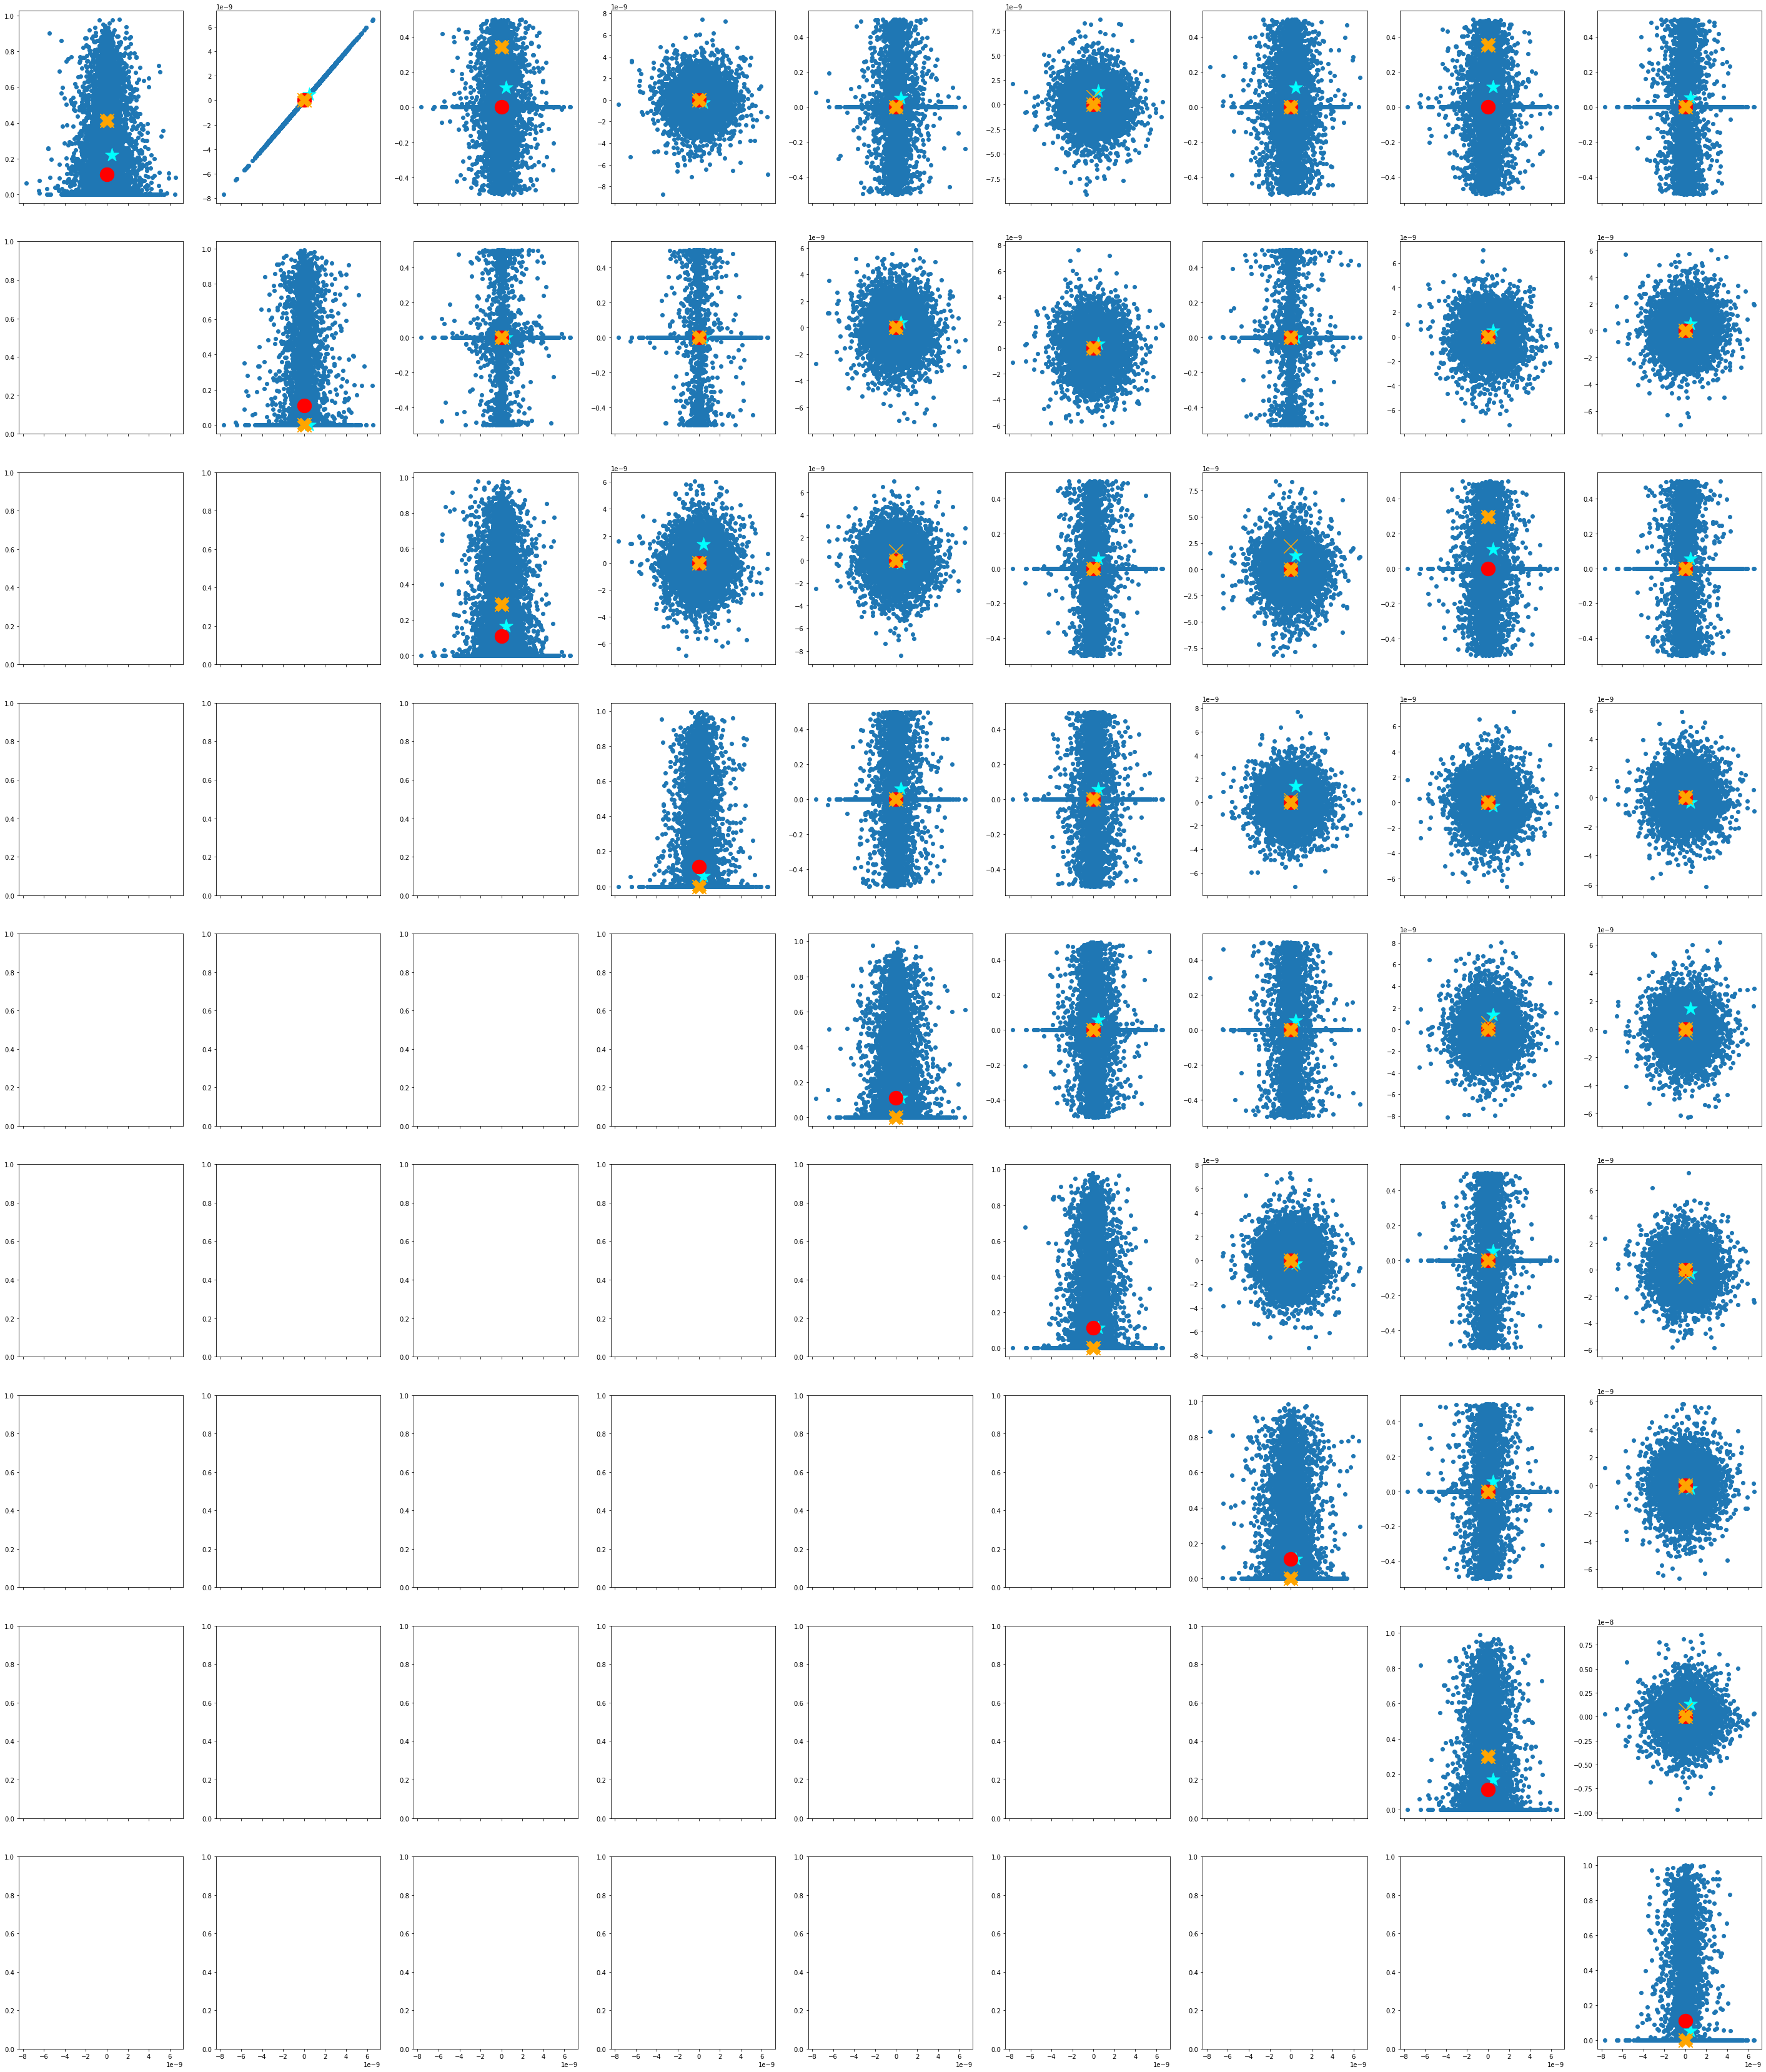

In [93]:
fig, axs = plt.subplots(n, n, figsize=(50, 60), sharex=True)

for j in range(n):
    for i in range(j + 1):
        axs[i, j].scatter(Z_samples[:, row, col], Z_samples[:, i, j])
        axs[i, j].scatter(Z_val[row, col], Z_val[i, j], c="aqua", s=5e2, marker="*")
        axs[i, j].scatter(Z_center[row, col], Z_center[i, j], c="red", s=5e2, marker="o")
        axs[i, j].scatter(Z_fixed_point[row, col], Z_fixed_point[i, j], c="orange", s=5e2, marker="X")
        axs[i, j].scatter(Z_path[:, row, col], Z_path[:, i, j], c="orange", s=5e2, marker="x")

### Grotschel

In [94]:
# c = cp.Parameter(n)
# sampling_prob_grotschel = cp.Problem(cp.Minimize(c @ x), constraints_grotschel)
sampling_prob_grotschel = cp.Problem(cp.Minimize(cp.trace(C @ X)), constraints_grotschel)

In [95]:
try:
    X_samples = np.load(X_samples_path)
except:
    X_samples = np.array([])

In [96]:
sampling_iter = 1000
X_new_samples = [[]] * sampling_iter

for i in range(sampling_iter):
    # c.value = rng.uniform(-1, 1, n)
    A = rng.uniform(-1, 1, (n,n))
    C.value = A.T + A
    sampling_prob_grotschel.solve()
    X_new_samples[i] = X.value

if len(X_samples) == 0:
    X_samples = np.array(X_new_samples)
else:
    X_samples = np.append(X_samples, np.array(X_new_samples), axis=0)

In [97]:
np.save(X_samples_path, X_samples)

In [98]:
row = 0
col = 2

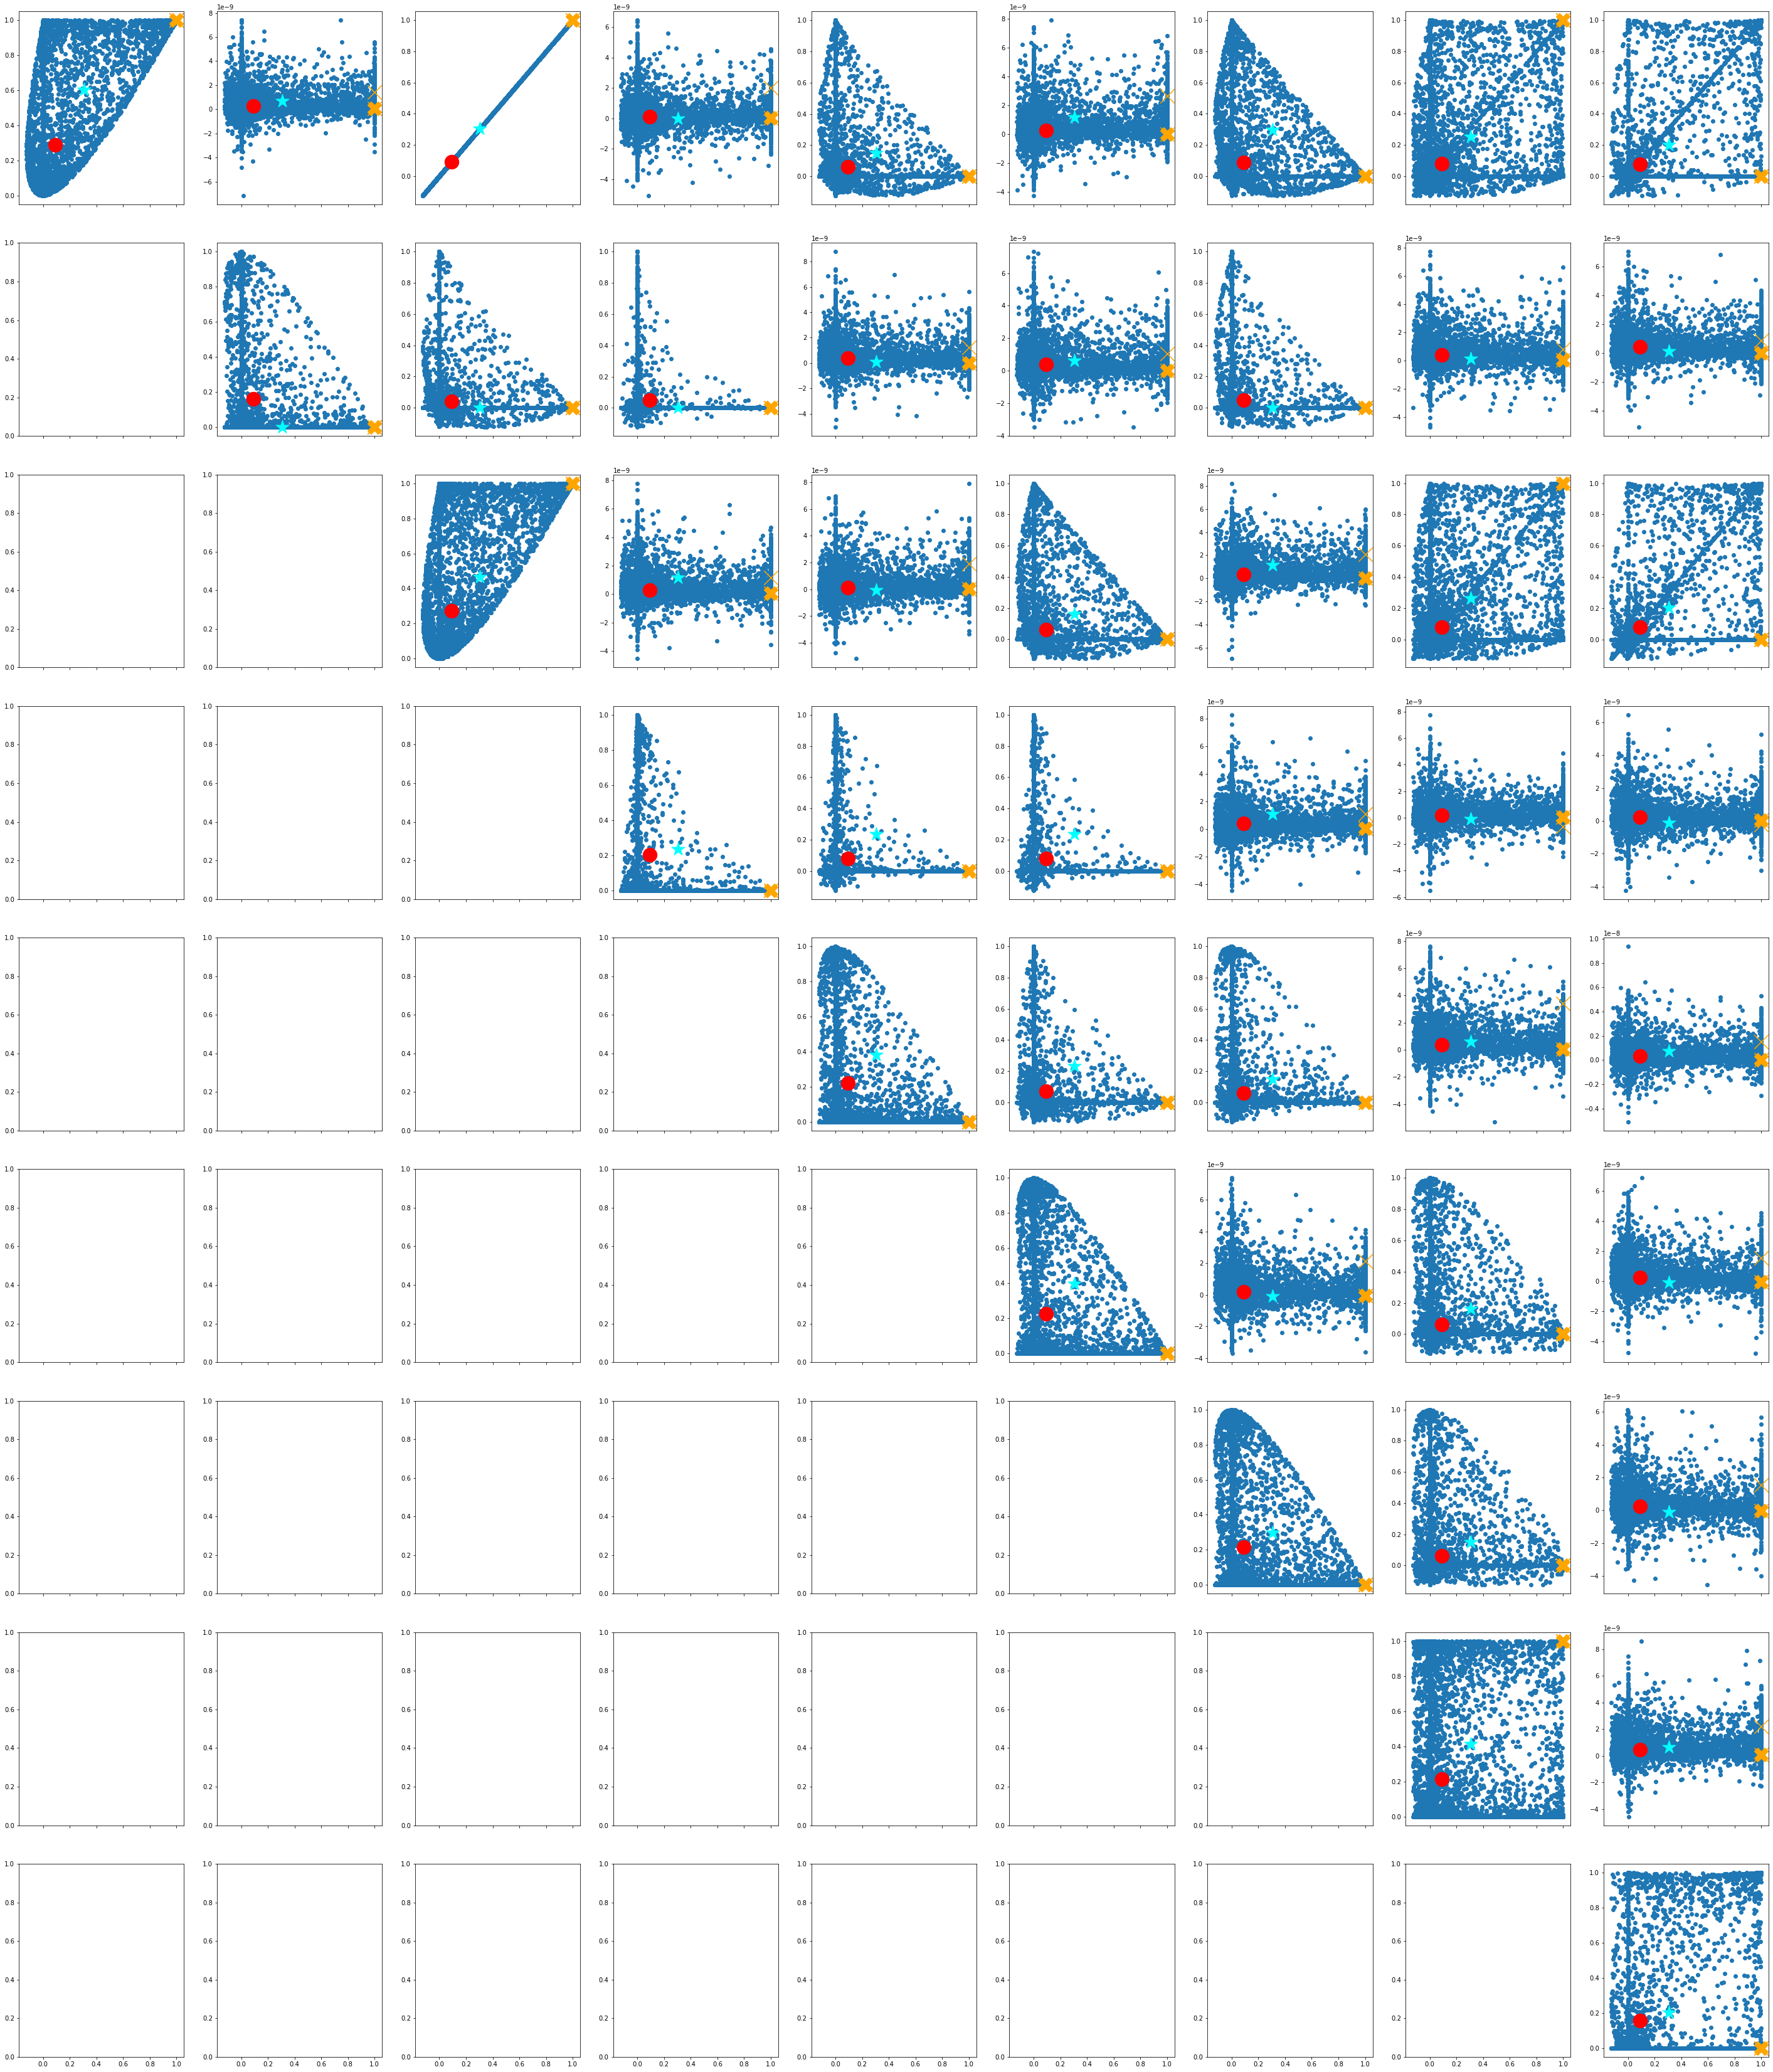

In [99]:
fig, axs = plt.subplots(n, n, figsize=(50, 60), sharex=True)

for j in range(n):
    for i in range(j + 1):
        axs[i, j].scatter(X_samples[:, row, col], X_samples[:, i, j])
        axs[i, j].scatter(X_val[row, col], X_val[i, j], c="aqua", s=5e2, marker="*")
        axs[i, j].scatter(X_center[row, col], X_center[i, j], c="red", s=5e2, marker="o")
        axs[i, j].scatter(X_fixed_point[row, col], X_fixed_point[i, j], c="orange", s=5e2, marker="X")
        axs[i, j].scatter(X_path[:, row, col], X_path[:, i, j], c="orange", s=5e2, marker="x")